# QFT: Gate Ansatz vs MPO Ansatz (with bounded Bond-Dimensions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

### State preparation

In [2]:
N = (4, 8, 16, 32, 64, 128)
states = [prepare_entangled_state(N=n)[0] for n in N]

### Max. Bond-dim = 8

In [3]:
gate_times8 = []
gate_states8 = []

mpo_times8 = []
mpo_states8 = []

max_bond = 8

for n, mps0 in enumerate(states):
    ## QFT Gate
    mps_g, t_g = qft_with_gates(mps0, max_bond=max_bond)
    gate_states8.append(mps_g)
    gate_times8.append(t_g)
    
    ## QFT MPO
    mps_m, t_m = qft_with_mpo(mps0, constr_bond=8, zip_up_bond=max_bond)
    mpo_states8.append(mps_m)
    mpo_times8.append(t_m)
    print(f"N={N[n]} done")


N=4 done
N=8 done
N=16 done
N=32 done
N=64 done
N=128 done


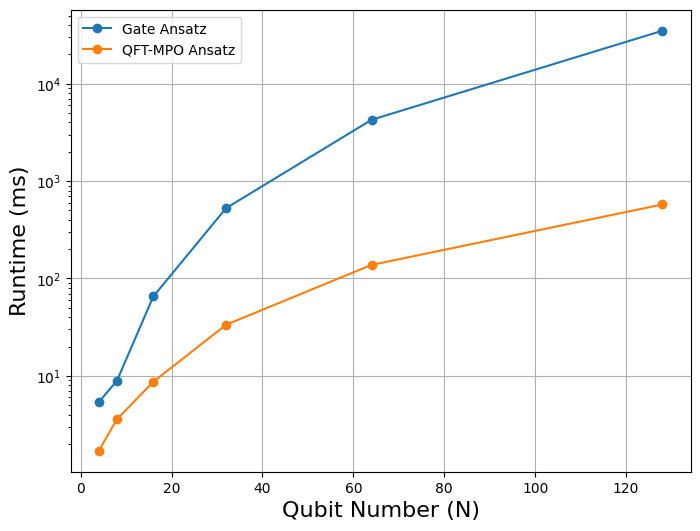

In [4]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 8)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

plt.plot(N, gate_times8, "-o", label="Gate Ansatz")
plt.plot(N, mpo_times8, "-o", label="QFT-MPO Ansatz")

plt.yscale("log")

plt.legend()
plt.show()

In [5]:
print(f"Gate Ansatz: {gate_times8}")
print(f"QFT-MPO Ansatz: {mpo_times8}")

Gate Ansatz: [5.3759999999999994, 8.940999999999999, 65.446, 527.23, 4257.131, 34984.896]
QFT-MPO Ansatz: [1.703, 3.591, 8.695, 33.485, 137.743, 575.442]


### Max. Bond-dim = 16

In [6]:
gate_times16 = []
gate_states16 = []

mpo_times16 = []
mpo_states16 = []

max_bond = 16

for n, mps0 in enumerate(states):
    ## QFT Gate
    mps_g, t_g = qft_with_gates(mps0, max_bond=max_bond)
    gate_states16.append(mps_g)
    gate_times16.append(t_g)
    
    ## QFT MPO
    mps_m, t_m = qft_with_mpo(mps0, constr_bond=8, zip_up_bond=max_bond)
    mpo_states16.append(mps_m)
    mpo_times16.append(t_m)
    print(f"N={N[n]} done")

N=4 done
N=8 done
N=16 done
N=32 done
N=64 done
N=128 done


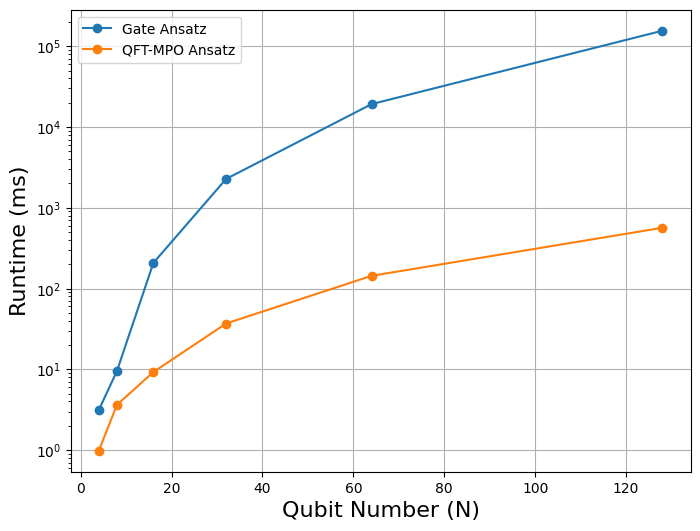

In [7]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 16)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

plt.plot(N, gate_times16, "-o", label="Gate Ansatz")
plt.plot(N, mpo_times16, "-o", label="QFT-MPO Ansatz")

plt.yscale("log")

plt.legend()
plt.show()

In [8]:
print(f"Gate Ansatz: {gate_times16}")
print(f"QFT-MPO Ansatz: {mpo_times16}")

Gate Ansatz: [3.1380000000000003, 9.573, 207.675, 2275.169, 19197.084, 155590.118]
QFT-MPO Ansatz: [0.983, 3.643, 9.258000000000001, 36.935, 143.71800000000002, 565.755]


## In linear-scale:

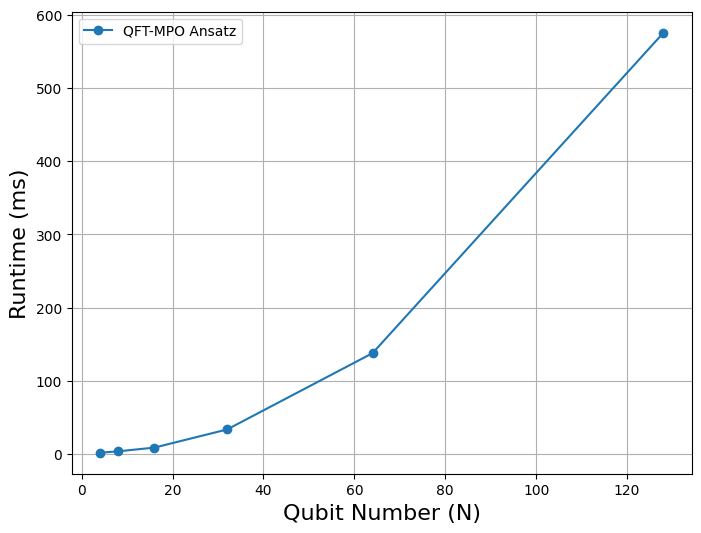

In [36]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 8)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

#plt.plot(N, gate_times8, "-o", label="Gate Ansatz")
plt.plot(N, mpo_times8, "-o", label="QFT-MPO Ansatz")

plt.legend()
plt.show()

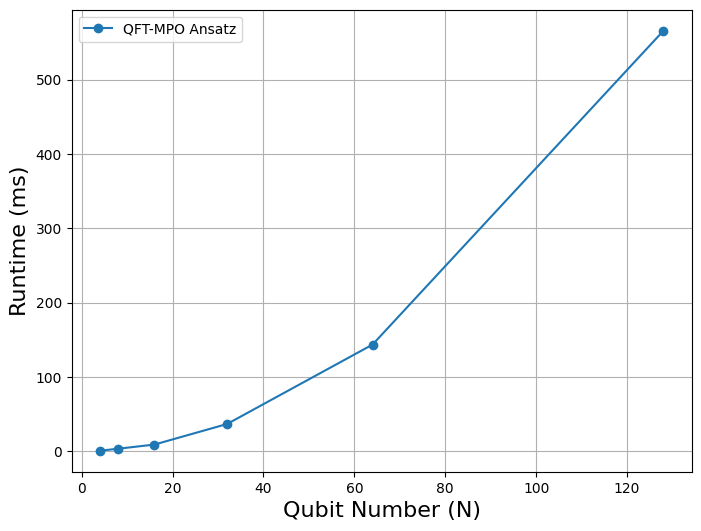

In [37]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 16)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

#plt.plot(N, gate_times16, "-o", label="Gate Ansatz")
plt.plot(N, mpo_times16, "-o", label="QFT-MPO Ansatz")

plt.legend()
plt.show()

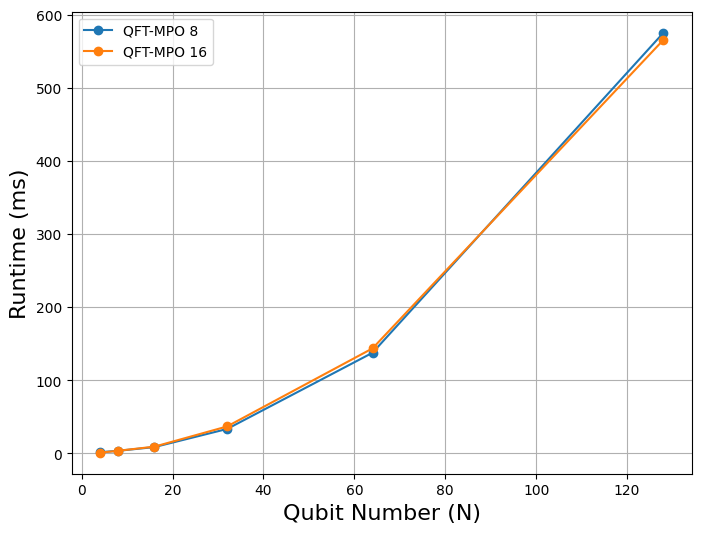

In [13]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 8)")
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

plt.plot(N, mpo_times8, "-o", label="QFT-MPO 8")
plt.plot(N, mpo_times16, "-o", label="QFT-MPO 16")

plt.legend()
plt.show()

## Different max. Bond-dims for N=32

max_bond=1 done
max_bond=2 done
max_bond=4 done
max_bond=8 done
max_bond=16 done


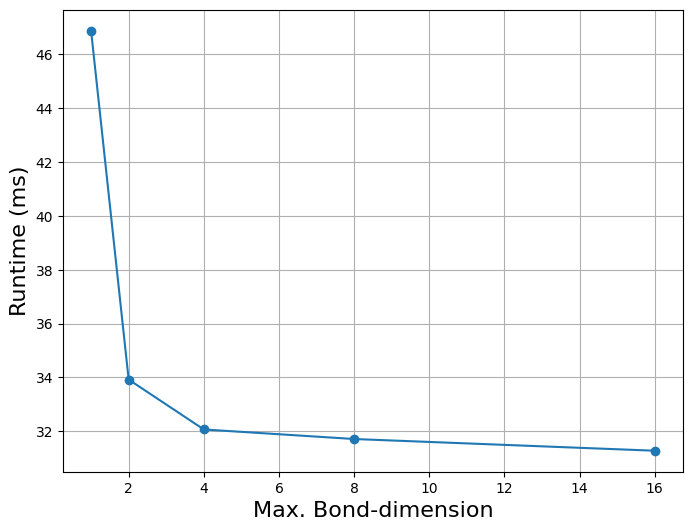

In [18]:
mps32 = states[3]
max_bonds = (1, 2, 4, 8, 16)
mpo_bond_times = []

for bond in max_bonds:
    mps_m, t_m = qft_with_mpo(mps32, constr_bond=8, zip_up_bond=bond)
    mpo_bond_times.append(t_m)
    print(f"max_bond={bond} done")
    
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Gate vs QFT-MPO Ansatz (max. bond 8)")
plt.xlabel("Max. Bond-dimension", fontsize=16)
plt.ylabel("Runtime (ms)", fontsize=16)

plt.plot(max_bonds, mpo_bond_times, "-o")

plt.show()

In [19]:
mpo_bond_times

[46.882, 33.921, 32.067, 31.711999999999996, 31.277]

### Time ratios

In [26]:
[gate_times16[i] / gate_times8[i] for i in range(len(gate_times8))]

[0.5837053571428573,
 1.0706856056369536,
 3.1732267823854783,
 4.315325379815261,
 4.50939470737452,
 4.447351165485814]

In [27]:
[mpo_times16[i] / mpo_times8[i] for i in range(len(mpo_times8))]

[0.5772166764533176,
 1.0144806460595934,
 1.064749856239218,
 1.1030312080035838,
 1.0433778849015922,
 0.983165983713389]

In [35]:
[mpo_times8[i] / mpo_times8[i-1] for i in range(1, len(mpo_times8))]

[2.108631826189078,
 2.421331105541632,
 3.851063829787234,
 4.1135732417500375,
 4.177649680927525]

In [34]:
[mpo_times16[i] / mpo_times16[i-1] for i in range(1, len(mpo_times8))]

[3.706002034587996,
 2.5413121054076315,
 3.9895225750702092,
 3.8911059970217954,
 3.936563269736567]